In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [ ]:
url_0 = 'https://www.restoran.ru/msk/opinions/?PAGEN_1={}'

Задание 1

In [ ]:
data = pd.DataFrame(columns=["Имя ресторана", "Автор", "Дата", "Рейтинг", "Отзыв"])

In [ ]:
df_name = []
df_author = []
df_date= []
df_rate = []
df_text = []

number_of_page = 1

In [ ]:
for i in range(79):
    url = url_0.format(number_of_page)
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Не удалось получить страницу {number_of_page}. Ответ сервера: {response.status_code}")
        break

    soup = BeautifulSoup(response.text, "lxml")
    reviews = soup.find_all("div", "review-wrap")

    if number_of_page == 79:
        break
    number_of_page += 1

    for review in reviews:
        if None:
            continue

        #time.sleep(3)
        print("")



        name = review.find("a")
        if name is None:
          df_name.append(None)
        if name:
            print("Название места:", name.text.strip())
            df_name.append(name.text.strip())

        author_0 = review.find_next("div", class_="user-name")
        author = author_0
        if author:
            print("Автор:", author.text.strip())
            df_author.append(author.text.strip())

        date_0 = review.find("div", class_="review-date")
        date = date_0
        if date:
            print("Дата:", date.text.strip())
            df_date.append(date.text.strip())

        rate_0 = review.find("div", class_="place-rating")
        if rate_0 is None:
          df_rate.append(None)
        if rate_0:
            rate = rate_0.find("span")
            if rate is None:
              df_rate.append(None)
            if rate:
                print("Оценка:", rate.text.strip())
                df_rate.append(float(rate.text.strip()))

        text_0 = review.find_next("span", class_="review-text-preview")
        text = review.find_next("span", class_="review-text-full")

        if (text is not None) and text_0.text[0:10] == text.text[0:10]:
            print("Текст:", text.text.strip())
            df_text.append(text.text.strip())
        else:
            print("Текст:", text_0.text.strip())
            df_text.append(text_0.text.strip())


Выходные данные были обрезаны до нескольких последних строк (5000).
С уважением и наилучшими пожеланиями учитывать разных категорий посетителей, Татьяна.

Название места: Ресторан Порто Миконос
Автор: Михаил
Дата: 6 декабря 2022
Оценка: 4.7
Текст: Очень вкусно и приятная атмосфера

Название места: Ресторан Doctor Watson / Доктор Ватсон
Автор: Виталина
Дата: 6 декабря 2022
Оценка: 5
Текст: рекомендую

Название места: Клуб Hot Collection / Хот Коллекшн
Автор: Wortix
Дата: 6 декабря 2022
Оценка: 4.9
Текст: Остался под максимальным впечатлением, красивая обстановка, свет и музыка, так же очень симпатичные девушки, планирую посещать ещё данное заведение

Название места: Ресторан Brasserie Lambic / Брассери Ламбик (Долгоруковская)
Автор: Андрей
Дата: 5 декабря 2022
Оценка: 3.5
Текст: Шикарное место) 
Лучшие ))))

Название места: Клуб Hot Collection / Хот Коллекшн
Автор: Иван
Дата: 5 декабря 2022
Оценка: 4.9
Текст: Достойное заведение приличного уровня, очень понравилось качество обслуживания

In [ ]:
import openpyxl

wb = openpyxl.Workbook()

sheet = wb.active

for i, value in enumerate(df_name, start=1):
    sheet.cell(row=i, column=1, value=value)

for i, value in enumerate(df_author, start=1):
    sheet.cell(row=i, column=2, value=value)

for i, value in enumerate(df_date, start=1):
    sheet.cell(row=i, column=3, value=value)

for i, value in enumerate(df_rate, start=1):
    sheet.cell(row=i, column=4, value=value)

for i, value in enumerate(df_text, start=1):
    sheet.cell(row=i, column=5, value=value)

wb.save('dataset.xlsx')

In [ ]:
data = pd.read_excel('dataset.xlsx', header = None, names = ['Имя ресторана', 'Автор', 'Дата', 'Рейтинг', 'Отзыв'])
data

,Имя ресторана,Автор,Дата,Рейтинг,Отзыв
0,Ресторан Бочка,Диана,20 сентября 2023,4.8,"Очень понравился ресторан, хочется его рекомен..."
1,Ресторан Мегрелия,Роман,19 сентября 2023,4.7,"Душевный ресторан, очень подходит для романтич..."
2,Банкетный зал Зал приемов «Добролюбофф»,Светлана,18 сентября 2023,4.7,Хочу поблагодарить всю команду зала Добролюбоф...
3,Ресторан Eshak / Ишак (Арбат),natasha.,18 сентября 2023,4.2,"Плов 10 из 10, в первый раз попробовала манты ..."
4,Кафе Шоколадница,Надежда,17 сентября 2023,2.8,Отвратительное обслуживание Шоколадница на Лен...
...,...,...,...,...,...
1475,NaN,елена,23 мая 2022,NaN,мясо супер
1476,NaN,Алена Д,23 мая 2022,NaN,Отмечали день рождения здесь. Всё замечательно...
1477,NaN,elen-orel,23 мая 2022,NaN,Пришли по совету коллеги с работы. Отзывы и об...
1478,NaN,Артем,22 мая 2022,NaN,приятная атмосфера. К сету в подарок идёт тапа...


Задание 2

Датасет имеет 1480 строк и состоит из 5 колонок: "Имя ресторана", "Автор", "Дата", "Рейтинг", "Отзыв". Есть пустые значения в колонках Рейтинг и Имя ресторана.

Все колонки, кроме "Ретинг" имеют тип object. Потому что при парсинге эта колонка была считана как число с плавающей точкой для дальнейшего счета.

In [ ]:
data.info() # Информация о типах данных и пррпущенных значениях

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Имя ресторана  1464 non-null   object 
 1   Автор          1479 non-null   object 
 2   Дата           1480 non-null   object 
 3   Рейтинг        1458 non-null   float64
 4   Отзыв          1480 non-null   object 
dtypes: float64(1), object(4)
memory usage: 57.9+ KB


In [ ]:
data.describe() # Сводная статистика числовых переменных

,Рейтинг
count,1458.000000
mean,4.418587
std,0.849654
min,1.000000
25%,4.300000
50%,4.800000
75%,4.975000
max,5.000000


In [ ]:
data.isnull()  # проверка на неполные значения
data = data.dropna()  # удаление строк с неполными значениями
data

,Имя ресторана,Автор,Дата,Рейтинг,Отзыв
0,Ресторан Бочка,Диана,20 сентября 2023,4.8,"Очень понравился ресторан, хочется его рекомен..."
1,Ресторан Мегрелия,Роман,19 сентября 2023,4.7,"Душевный ресторан, очень подходит для романтич..."
2,Банкетный зал Зал приемов «Добролюбофф»,Светлана,18 сентября 2023,4.7,Хочу поблагодарить всю команду зала Добролюбоф...
3,Ресторан Eshak / Ишак (Арбат),natasha.,18 сентября 2023,4.2,"Плов 10 из 10, в первый раз попробовала манты ..."
4,Кафе Шоколадница,Надежда,17 сентября 2023,2.8,Отвратительное обслуживание Шоколадница на Лен...
...,...,...,...,...,...
1453,Ресторан Cafe Imperial,Ольга,27 мая 2022,4.4,Довелось в марте побывать в этом замечательном...
1454,Кафе Хинкали&VINO (Таганская),Eduard,27 мая 2022,5.0,Есть китя
1455,Караоке-бар DUETS,Ирина,27 мая 2022,4.6,Наш с сестрой часто посещаемый ресторан. Краси...
1456,Банкетный зал Салют. Ресторанный комплекс,Андрей,27 мая 2022,4.9,Невозможно. Дозвониться. Чтоб заделать. Зака...


In [ ]:
a = data.duplicated().sum()
print('Дубликаты:', a)
data = data.drop_duplicates()
data

Дубликаты: 1


,Имя ресторана,Автор,Дата,Рейтинг,Отзыв
0,Ресторан Бочка,Диана,20 сентября 2023,4.8,"Очень понравился ресторан, хочется его рекомен..."
1,Ресторан Мегрелия,Роман,19 сентября 2023,4.7,"Душевный ресторан, очень подходит для романтич..."
2,Банкетный зал Зал приемов «Добролюбофф»,Светлана,18 сентября 2023,4.7,Хочу поблагодарить всю команду зала Добролюбоф...
3,Ресторан Eshak / Ишак (Арбат),natasha.,18 сентября 2023,4.2,"Плов 10 из 10, в первый раз попробовала манты ..."
4,Кафе Шоколадница,Надежда,17 сентября 2023,2.8,Отвратительное обслуживание Шоколадница на Лен...
...,...,...,...,...,...
1453,Ресторан Cafe Imperial,Ольга,27 мая 2022,4.4,Довелось в марте побывать в этом замечательном...
1454,Кафе Хинкали&VINO (Таганская),Eduard,27 мая 2022,5.0,Есть китя
1455,Караоке-бар DUETS,Ирина,27 мая 2022,4.6,Наш с сестрой часто посещаемый ресторан. Краси...
1456,Банкетный зал Салют. Ресторанный комплекс,Андрей,27 мая 2022,4.9,Невозможно. Дозвониться. Чтоб заделать. Зака...


Задание 3

In [ ]:
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

[Text(0.5, 0, 'Как часто встречается'),
 Text(0, 0.5, 'Имя ресторана'),
 Text(0.5, 1.0, 'Самые часто встречающиеся рестораны')]

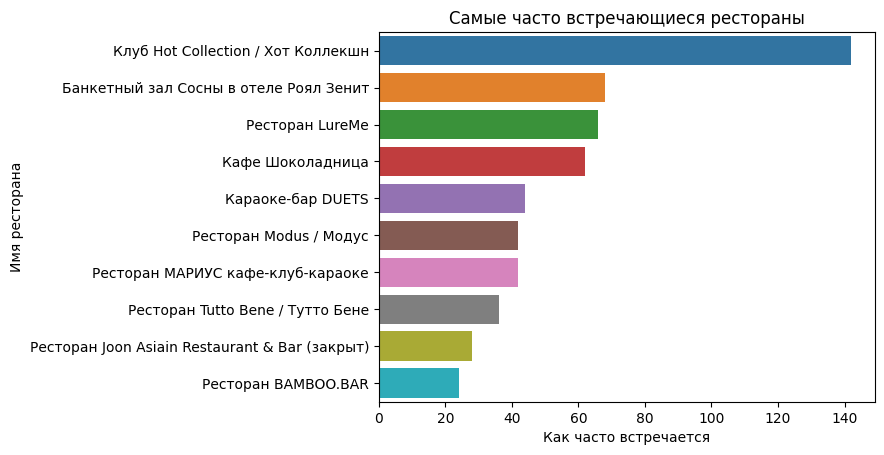

In [ ]:
freq_counts = data['Имя ресторана'].value_counts()

x = freq_counts[0:10]

a = sns.barplot(x = x, y = x.index)
a.set(xlabel = 'Как часто встречается', ylabel = 'Имя ресторана', title = 'Самые часто встречающиеся рестораны')

In [ ]:
filtered = data[data['Имя ресторана'].isin(x.index)]
avg_rate = filtered.groupby('Имя ресторана')['Рейтинг'].mean()

[Text(0.5, 0, 'Рейтинг'),
 Text(0, 0.5, 'Имя ресторана'),
 Text(0.5, 1.0, 'Средний рейтинг')]

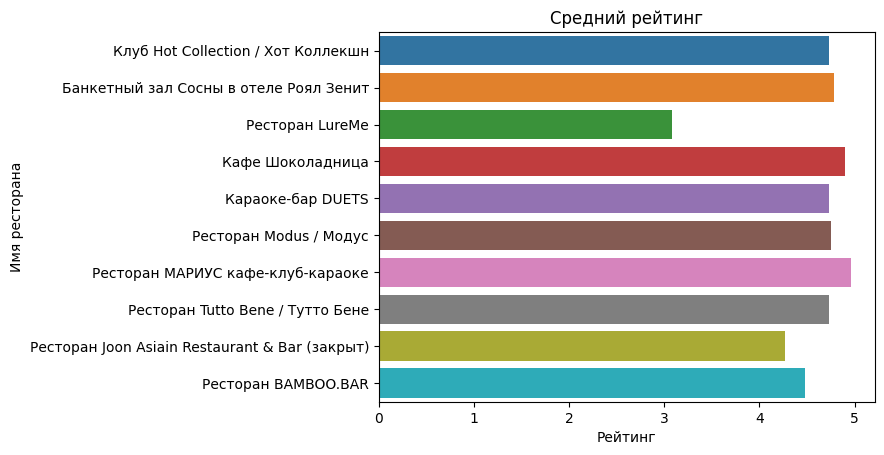

In [ ]:
b = sns.barplot(x = avg_rate, y = x.index)
b.set(xlabel = 'Рейтинг', ylabel = 'Имя ресторана', title = 'Средний рейтинг')

In [ ]:
sorted = data.sort_values('Рейтинг')
worst_top = sorted.head(10)

[Text(0.5, 1.0, 'Топ худших ресторанов')]

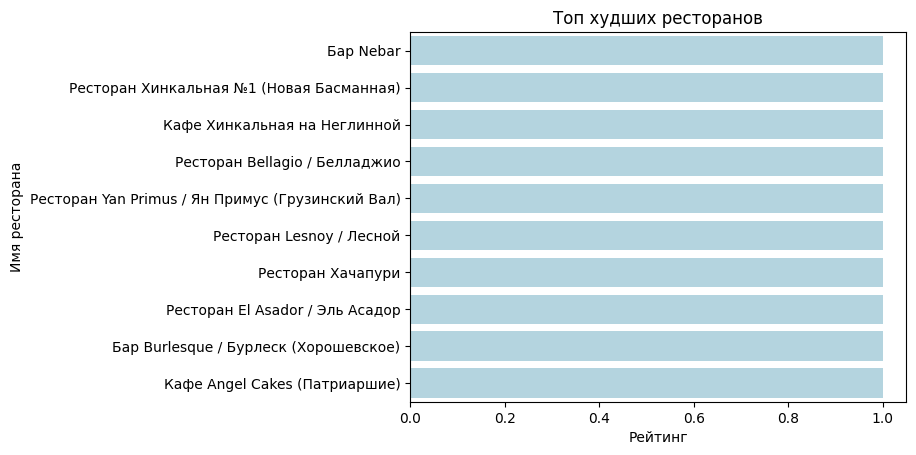

In [ ]:
b = sns.barplot(x='Рейтинг', y='Имя ресторана', data=worst_top, color='lightblue')
b.set(title = 'Топ худших ресторанов')

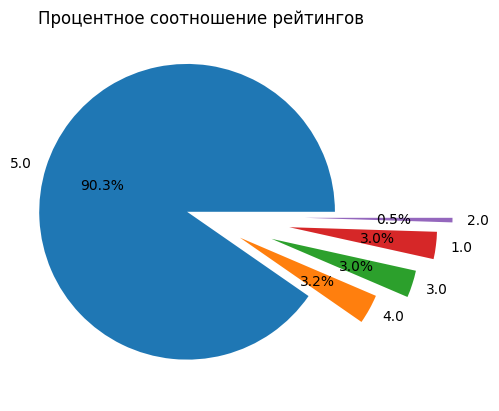

In [ ]:
ratings = [1, 2, 3, 4, 5]
rating_counts = data['Рейтинг'].value_counts()
filtered_rating_counts = rating_counts[rating_counts.index.isin(ratings)]
labels = filtered_rating_counts.index.map(str)
sizes = filtered_rating_counts.values / sum(filtered_rating_counts.values) * 100
explode = [0.1 , 0.3, 0.5, 0.6, 0.7]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode)

plt.title('Процентное соотношение рейтингов')
plt.show()

Задание 4

In [ ]:
rating_counts = data['Рейтинг'].value_counts()
rating_counts

5.0    365
4.9    298
4.8    144
4.6     85
4.5     84
4.7     77
2.8     71
4.3     54
3.7     23
2.4     22
4.1     22
4.2     21
4.4     18
3.6     16
3.8     16
4.0     13
3.0     12
1.0     12
3.3     12
3.9     10
2.9      7
3.1      7
3.4      6
1.9      6
2.3      6
1.8      6
3.5      6
2.5      5
2.6      5
2.7      4
1.7      4
3.2      4
2.2      4
1.4      3
2.1      2
1.2      2
2.0      2
1.3      1
1.6      1
Name: Рейтинг, dtype: int64

In [ ]:
from sklearn.utils import resample

class_1 = data[data['Рейтинг'] == 1]
class_2 = data[data['Рейтинг'] == 2]
class_3 = data[data['Рейтинг'] == 3]
class_4 = data[data['Рейтинг'] == 4]
class_5 = data[data['Рейтинг'] == 5]

class_1_balanced = resample(class_1, replace=True, n_samples=len(class_5))
class_2_balanced = resample(class_2, replace=True, n_samples=len(class_5))
class_3_balanced = resample(class_3, replace=True, n_samples=len(class_5))
class_4_balanced = resample(class_4, replace=True, n_samples=len(class_5))

balanced_data = pd.concat([class_1_balanced, class_2_balanced, class_3_balanced, class_4_balanced, class_5])

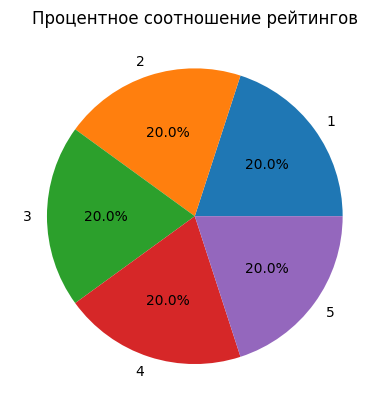

In [ ]:
plt.pie(balanced_data['Рейтинг'].value_counts(), labels = ratings, autopct='%1.1f%%')

plt.title('Процентное соотношение рейтингов')
plt.show()

In [ ]:
balanced_data['Рейтинг']

725     1.0
28      1.0
721     1.0
357     1.0
725     1.0
       ... 
1447    5.0
1450    5.0
1451    5.0
1452    5.0
1454    5.0
Name: Рейтинг, Length: 1825, dtype: float64

Задание 5

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time

X = data['Отзыв']
y = data['Рейтинг']

vectorizer = CountVectorizer()
X_vect = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)
y_test = y_test.round().astype(int)
y_train = y_train.round().astype(int)

models = [
    ("Logistic Regression", LogisticRegression()),
    ("Support Vector Machine", SVC()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier())
]

results = []

for model_name, model in models:
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test)
    test_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)

    results.append([model_name, training_time, test_time, accuracy])

results_df = pd.DataFrame(results, columns=["Model", "Training Time (s)", "Test Time (s)", "Accuracy"])

print(results_df)

                    Model  Training Time (s)  Test Time (s)  Accuracy
0     Logistic Regression           1.822145       0.000714  0.636986
1  Support Vector Machine           1.221713       0.185624  0.684932
2           Random Forest           2.755372       0.024831  0.681507
3       Gradient Boosting          16.566200       0.003090  0.674658


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import time

X = data['Отзыв']
y = data['Рейтинг']

vectorizer = CountVectorizer()
X_vect = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)
y_test = y_test.round().astype(int)
y_train = y_train.round().astype(int)

model = LogisticRegression()

class_report = classification_report(y_test, y_pred, output_dict=True)

data = {
    "Accuracy": [class_report['accuracy']],
    "Precision (Class 1)": [class_report['1']['precision']],
    "Recall (Class 1)": [class_report['1']['recall']],
    "F1-score (Class 1)": [class_report['1']['f1-score']],
    "Precision (Class 2)": [class_report['2']['precision']],
    "Recall (Class 2)": [class_report['2']['recall']],
    "F1-score (Class 2)": [class_report['2']['f1-score']],
    "Precision (Class 3)": [class_report['3']['precision']],
    "Recall (Class 3)": [class_report['3']['recall']],
    "F1-score (Class 3)": [class_report['3']['f1-score']],
    "Precision (Class 4)": [class_report['4']['precision']],
    "Recall (Class 4)": [class_report['4']['recall']],
    "F1-score (Class 4)": [class_report['4']['f1-score']],
    "Precision (Class 5)": [class_report['5']['precision']],
    "Recall (Class 5)": [class_report['5']['recall']],
    "F1-score (Class 5)": [class_report['5']['f1-score']]
}

result_df = pd.DataFrame(data)
print(result_df)

   Accuracy  Precision (Class 1)  Recall (Class 1)  F1-score (Class 1)  \
0  0.674658                  0.0               0.0                 0.0   

   Precision (Class 2)  Recall (Class 2)  F1-score (Class 2)  \
0                  0.0               0.0                 0.0   

   Precision (Class 3)  Recall (Class 3)  F1-score (Class 3)  \
0                  0.2          0.038462            0.064516   

   Precision (Class 4)  Recall (Class 4)  F1-score (Class 4)  \
0             0.333333          0.037736            0.067797   

   Precision (Class 5)  Recall (Class 5)  F1-score (Class 5)  
0             0.708029              0.97            0.818565  


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('russian')

# Объединяем все отзывы в одну строку
text = " ".join(review for review in data['Отзыв'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


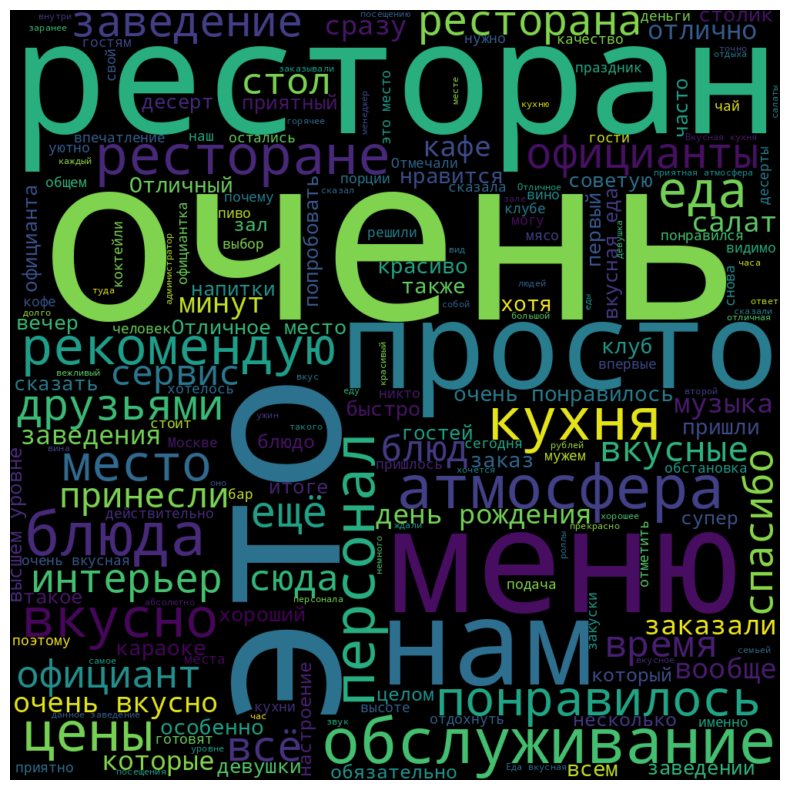

In [ ]:
wordcloud = WordCloud(stopwords=stop_words, width=1000, height=1000).generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()